### F1 2021 season analysis

in this notbook I will preform some analysis and data visulaization for the 2021 F1 season

data source (https://github.com/toUpperCase78/formula1-datasets/tree/master)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we load the data
race_calaneder = pd.read_csv('Data/formula1_2021season_calendar.csv').set_index('Round')
sprint_results = pd.read_csv('Data/formula1_2021season_sprintQualifyingResults.csv')
race_results = pd.read_csv('Data/formula1_2021season_raceResults.csv')
drivers = pd.read_csv('Data/formula1_2021season_drivers.csv').set_index('Abbreviation')
teams = pd.read_csv('Data/formula1_2021season_teams.csv')


In [3]:
race_calaneder

,Country,City,Circuit Name,GP Name,Race Date,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,Bahrain,Sakhir,Bahrain International Circuit,Bahrain,28 Mar 2021,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,Italy,Imola,Autodromo Enzo e Dino Ferrari,Emilia Romagna,18 Apr 2021,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
3,Portugal,Portimao,Autodromo Internacional do Algarve,Portugal,02 May 2021,2020,66,4.653,306.826,1:18.750,Lewis Hamilton,2020,15,1
4,Spain,Catalunya,Circuit de Barcelona-Catalunya,Spain,09 May 2021,1991,66,4.675,308.424,1:18.149,Max Verstappen,2021,16,2
5,Monaco,Monte Carlo,Circuit de Monaco,Monaco,23 May 2021,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
6,Azerbaijan,Baku,Baku City Circuit,Azerbaijan,06 Jun 2021,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
7,France,Le Castellet,Circuit Paul Ricard,France,20 Jun 2021,1971,53,5.842,309.690,1:32.740,Sebastian Vettel,2019,15,2
8,Austria,Spielberg,Red Bull Ring,Styria,04 Jul 2021,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3
9,Austria,Spielberg,Red Bull Ring,Austria,18 Jul 2021,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3


In [4]:
drivers

,Driver,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,182,4165.5,288,7,1(x103),1,07/01/1985,"Stevenage, England"
BOT,Valtteri Bottas,77,Mercedes,Finland,67,1738.0,178,0,1(x10),1,28/08/1989,"Nastola, Finland"
VER,Max Verstappen,33,Red Bull Racing,Netherlands,60,1557.5,141,1,1(x20),1,30/09/1997,"Hasselt, Belgium"
PER,Sergio Perez,11,Red Bull Racing,Mexico,15,896.0,214,0,1(x2),2,26/01/1990,"Guadalajara, Mexico"
LEC,Charles Leclerc,16,Ferrari,Monaco,13,560.0,81,0,1(x2),1,16/10/1997,"Monte Carlo, Monaco"
SAI,Carlos Sainz,55,Ferrari,Spain,6,536.5,141,0,2(x2),2,01/09/1994,"Madrid, Spain"
NOR,Lando Norris,4,McLaren,United Kingdom,5,306.0,60,0,2(x1),1,13/11/1999,"Bristol, England"
RIC,Daniel Ricciardo,3,McLaren,Australia,32,1274.0,210,0,1(x8),1,01/07/1989,"Perth, Australia"
OCO,Esteban Ocon,31,Alpine,France,2,272.0,89,0,1(x1),3,17/09/1996,"Evreux, Normandy"


In [5]:
teams.index=(range(1,11))
teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Mercedes,Mercedes-AMG Petronas Formula One Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W12,Mercedes,1970,8,1(x115),127,85
2,Red Bull,Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB16B,Honda,1997,4,1(x75),73,76
3,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualteri,SF21,Ferrari,1950,16,1(x239),223,253
4,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL35M,Mercedes,1966,8,1(x183),156,160
5,Alpine,Alpine F1 Team,"Enstone, United Kingdom",Davide Brivio,Pat Fry / Remi Taffin,A521,Renault,1986,2,1(x21),20,15
6,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT02,Honda,1985,0,1(x2),1,2
7,Aston Martin,Aston Martin Cognizant Formula One Team,"Silverstone, United Kingdom",Otmar Szafnauer,Andrew Green,AMR21,Mercedes,2018,0,1(x1),1,0
8,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW43B,Mercedes,1978,9,1(x114),129,133
9,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C41,Ferrari,1993,0,1(x1),1,5
10,Haas,Uralkali Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-21,Ferrari,2016,0,4(x1),0,2


now that we loaded our data lets show the top 10 for 3 random rounds

lest start with round 3 Portugal

In [6]:
race_results[race_results['Track']=='Portugal'][:10].set_index('Position').drop('Track',axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,44,Lewis Hamilton,Mercedes,2.0,66,1:34:31.421,25.0,No,1:20.933
2,33,Max Verstappen,Red Bull Racing Honda,3.0,66,+29.148,18.0,No,1:20.695
3,77,Valtteri Bottas,Mercedes,1.0,66,+33.530,16.0,Yes,1:19.865
4,11,Sergio Perez,Red Bull Racing Honda,4.0,66,+39.735,12.0,No,1:20.643
5,4,Lando Norris,McLaren Mercedes,7.0,66,+51.369,10.0,No,1:21.696
6,16,Charles Leclerc,Ferrari,8.0,66,+55.781,8.0,No,1:21.496
7,31,Esteban Ocon,Alpine Renault,6.0,66,+63.749,6.0,No,1:21.886
8,14,Fernando Alonso,Alpine Renault,13.0,66,+64.808,4.0,No,1:21.032
9,3,Daniel Ricciardo,McLaren Mercedes,16.0,66,+75.369,2.0,No,1:21.987


now lets shpw the results of round 6 Azerbaijan

In [7]:
race_results[race_results['Track']=='Azerbaijan'][:10].set_index('Position').drop('Track',axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25.0,No,1:44.687
2,5,Sebastian Vettel,Aston Martin Mercedes,11.0,51,+1.385,18.0,No,1:44.890
3,10,Pierre Gasly,AlphaTauri Honda,4.0,51,+2.762,15.0,No,1:45.220
4,16,Charles Leclerc,Ferrari,1.0,51,+3.828,12.0,No,1:45.382
5,4,Lando Norris,McLaren Mercedes,9.0,51,+4.754,10.0,No,1:45.326
6,14,Fernando Alonso,Alpine Renault,8.0,51,+6.382,8.0,No,1:45.624
7,22,Yuki Tsunoda,AlphaTauri Honda,7.0,51,+6.624,6.0,No,1:44.939
8,55,Carlos Sainz,Ferrari,5.0,51,+7.709,4.0,No,1:45.700
9,3,Daniel Ricciardo,McLaren Mercedes,13.0,51,+8.874,2.0,No,1:45.713


Showing the results of round 15 Russia

In [8]:
race_results[race_results['Track']=='Russia'][:10].set_index('Position').drop('Track',axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,44,Lewis Hamilton,Mercedes,4.0,53,1:30:41.001,25.0,No,1:37.575
2,33,Max Verstappen,Red Bull Racing Honda,20.0,53,+53.271,18.0,No,1:38.396
3,55,Carlos Sainz,Ferrari,2.0,53,+62.475,15.0,No,1:39.294
4,3,Daniel Ricciardo,McLaren Mercedes,5.0,53,+65.607,12.0,No,1:39.124
5,77,Valtteri Bottas,Mercedes,16.0,53,+67.533,10.0,No,1:38.216
6,14,Fernando Alonso,Alpine Renault,6.0,53,+81.321,8.0,No,1:38.686
7,4,Lando Norris,McLaren Mercedes,1.0,53,+87.224,7.0,Yes,1:37.423
8,7,Kimi Raikkönen,Alfa Romeo Racing Ferrari,13.0,53,+88.955,4.0,No,1:40.289
9,11,Sergio Perez,Red Bull Racing Honda,8.0,53,+90.076,2.0,No,1:39.215


now let us try to show the drivers standing

first lets show the drivers standing for

In [9]:
driver_pts=(race_results.groupby(['Driver','Team'])[['Points']].sum()).sort_values(by='Points',ascending=False)
driver_pts

,,Points
Driver,Team,
Max Verstappen,Red Bull Racing Honda,388.5
Lewis Hamilton,Mercedes,385.5
Valtteri Bottas,Mercedes,219.0
Sergio Perez,Red Bull Racing Honda,190.0
Carlos Sainz,Ferrari,163.5
Lando Norris,McLaren Mercedes,160.0
Charles Leclerc,Ferrari,159.0
Daniel Ricciardo,McLaren Mercedes,114.0
Pierre Gasly,AlphaTauri Honda,110.0


we notice that both Max anf Lewis are tied in the points, well it is because we did not consider the sprint results points

In [10]:
# lets fix this now and consider the sprint points into our analysis

sprint_results.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,Great Britain,1,33,Max Verstappen,Red Bull Racing Honda,2,17,25:38.426,3
1,Great Britain,2,44,Lewis Hamilton,Mercedes,1,17,+1.430,2
2,Great Britain,3,77,Valtteri Bottas,Mercedes,3,17,+7.502,1
3,Great Britain,4,16,Charles Leclerc,Ferrari,4,17,+11.278,0
4,Great Britain,5,4,Lando Norris,McLaren Mercedes,6,17,+24.111,0


In [11]:
#lets just filter only the drivers who got points from the sprint

sprint_new =sprint_results[sprint_results['Points']>0]

sprint_new

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,Great Britain,1,33,Max Verstappen,Red Bull Racing Honda,2,17,25:38.426,3
1,Great Britain,2,44,Lewis Hamilton,Mercedes,1,17,+1.430,2
2,Great Britain,3,77,Valtteri Bottas,Mercedes,3,17,+7.502,1
20,Italy,1,77,Valtteri Bottas,Mercedes,1,18,27:54.078,3
21,Italy,2,33,Max Verstappen,Red Bull Racing Honda,3,18,+2.325,2
22,Italy,3,3,Daniel Ricciardo,McLaren Mercedes,5,18,+14.534,1
40,Brazil,1,77,Valtteri Bottas,Mercedes,2,24,29:09.559,3
41,Brazil,2,33,Max Verstappen,Red Bull Racing Honda,1,24,+1.170,2
42,Brazil,3,55,Carlos Sainz,Ferrari,5,24,+18.723,1


In [12]:
(sprint_new.groupby(['Driver'])[['Points']].sum()).sort_values(by='Points',ascending=False)

,Points
Driver,
Max Verstappen,7
Valtteri Bottas,7
Lewis Hamilton,2
Carlos Sainz,1
Daniel Ricciardo,1


In [13]:
driver_pts= (driver_pts+(sprint_results.groupby(['Team','Driver'])[['Points']].sum())).sort_values(by='Points',ascending=False).reset_index()
driver_pts.index=[i for i in range(1,22)]
driver_pts

,Driver,Team,Points
1,Max Verstappen,Red Bull Racing Honda,395.5
2,Lewis Hamilton,Mercedes,387.5
3,Valtteri Bottas,Mercedes,226.0
4,Sergio Perez,Red Bull Racing Honda,190.0
5,Carlos Sainz,Ferrari,164.5
6,Lando Norris,McLaren Mercedes,160.0
7,Charles Leclerc,Ferrari,159.0
8,Daniel Ricciardo,McLaren Mercedes,115.0
9,Pierre Gasly,AlphaTauri Honda,110.0
10,Fernando Alonso,Alpine Renault,81.0


now lets add them together

In [14]:
#create a simple function to add the points
def add_sprint_ponits(driver,track):
    track_index=(race_results.index[(race_results['Track']==track)&( race_results['Driver']==driver)])[0]
    new_point=sprint_new[(sprint_new['Driver']==driver) &( sprint_new['Track']==track)]['Points'].values[0]
    race_results.loc[track_index,'Points']+=new_point

In [15]:
add_sprint_ponits(driver='Max Verstappen',track='Great Britain')
add_sprint_ponits(driver='Max Verstappen',track='Italy')
add_sprint_ponits(driver='Max Verstappen',track='Brazil')
add_sprint_ponits(driver='Valtteri Bottas',track='Great Britain')
add_sprint_ponits(driver='Valtteri Bottas',track='Italy')
add_sprint_ponits(driver='Valtteri Bottas',track='Brazil')
add_sprint_ponits(driver='Lewis Hamilton',track='Great Britain')
add_sprint_ponits(driver='Daniel Ricciardo',track='Italy')
add_sprint_ponits(driver='Carlos Sainz',track='Brazil')

In [16]:
drivers

,Driver,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,182,4165.5,288,7,1(x103),1,07/01/1985,"Stevenage, England"
BOT,Valtteri Bottas,77,Mercedes,Finland,67,1738.0,178,0,1(x10),1,28/08/1989,"Nastola, Finland"
VER,Max Verstappen,33,Red Bull Racing,Netherlands,60,1557.5,141,1,1(x20),1,30/09/1997,"Hasselt, Belgium"
PER,Sergio Perez,11,Red Bull Racing,Mexico,15,896.0,214,0,1(x2),2,26/01/1990,"Guadalajara, Mexico"
LEC,Charles Leclerc,16,Ferrari,Monaco,13,560.0,81,0,1(x2),1,16/10/1997,"Monte Carlo, Monaco"
SAI,Carlos Sainz,55,Ferrari,Spain,6,536.5,141,0,2(x2),2,01/09/1994,"Madrid, Spain"
NOR,Lando Norris,4,McLaren,United Kingdom,5,306.0,60,0,2(x1),1,13/11/1999,"Bristol, England"
RIC,Daniel Ricciardo,3,McLaren,Australia,32,1274.0,210,0,1(x8),1,01/07/1989,"Perth, Australia"
OCO,Esteban Ocon,31,Alpine,France,2,272.0,89,0,1(x1),3,17/09/1996,"Evreux, Normandy"


In [17]:
drivers_top10=driver_pts.values[:10]
drivers_top10

array([['Max Verstappen', 'Red Bull Racing Honda', 395.5],
       ['Lewis Hamilton', 'Mercedes', 387.5],
       ['Valtteri Bottas', 'Mercedes', 226.0],
       ['Sergio Perez', 'Red Bull Racing Honda', 190.0],
       ['Carlos Sainz', 'Ferrari', 164.5],
       ['Lando Norris', 'McLaren Mercedes', 160.0],
       ['Charles Leclerc', 'Ferrari', 159.0],
       ['Daniel Ricciardo', 'McLaren Mercedes', 115.0],
       ['Pierre Gasly', 'AlphaTauri Honda', 110.0],
       ['Fernando Alonso', 'Alpine Renault', 81.0]], dtype=object)

In [18]:
def color_pl(value,top10):
    cl=[]
    for val in top10:
        if value =='drivers':
            abbr=val[0].split()[1].upper()[:3]
        

        elif value =='teams':
            abbr=val[0][0:4].upper()
        elif value =='team':
            abbr=val[0:4].upper()

        elif value =='driver':
            abbr= val.split()[1].upper()[:3]

        if abbr in ['HAM','BOT','MERC']:            cl.append("#00A19B")

        elif abbr in ['VER','PER','RED ']:           cl.append("#0600EF")

        elif abbr in ['LEC','SAI','FERR']:          cl.append("#FFF200")

        elif abbr in ['NOR','RIC','MCLA']:          cl.append("#FF8000")

        elif abbr in ['OCO','ALO','ALPI']:          cl.append("#0090FF")

        elif abbr in ['GAS','TSU','ALPH']:          cl.append("#2B4562")

        elif abbr in ['STR','VET','ASTO']:          cl.append("#006F62")

        elif abbr in ['RUS','LAT','WILL']:          cl.append("#00A0DE")

        elif abbr in ['RAI','GIO','KUB','ALFA']:    cl.append("#A42134")

        elif abbr in ['MSC','MAZ','HAAS']:          cl.append("#E6002B")
    
    return cl

         

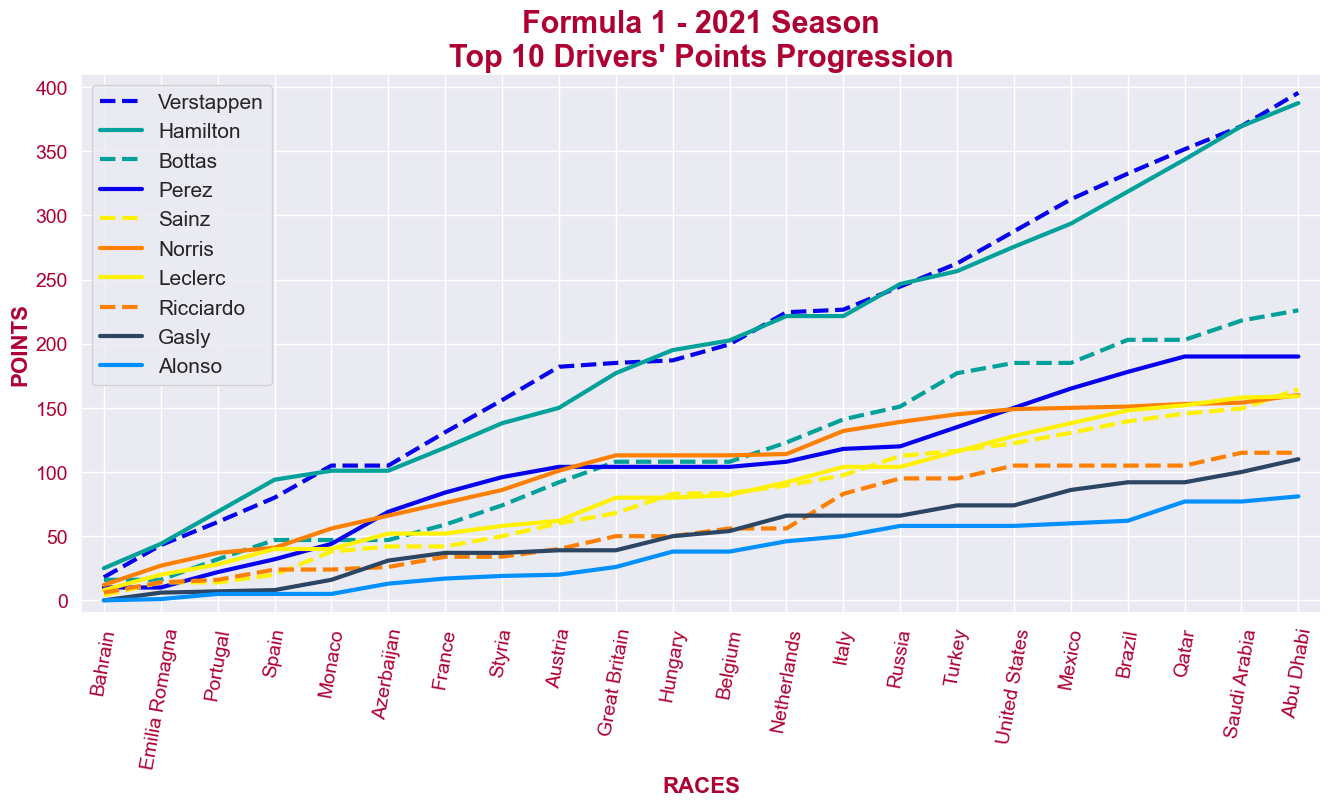

In [19]:
tracks=race_results['Track'].unique()

sns.set_theme()
plt.figure(figsize=(16,7))
plt.axis([-0.4, 21.4, -10, 410])
c= color_pl(value='drivers',top10=drivers_top10)
for i in range(len(drivers_top10)):
    ls='-'
    if drivers_top10[i][0] =='Max Verstappen' or drivers_top10[i][0] =='Valtteri Bottas' or drivers_top10[i][0]=='Daniel Ricciardo' or drivers_top10[i][0]=='Carlos Sainz': ls='--'
    pts=race_results[race_results['Driver']==drivers_top10[i][0]]['Points'].values
    plt.plot(np.cumsum(pts),linewidth=3, label=drivers_top10[i][0].split()[1], color= c[i],linestyle=ls)
    
plt.title("Formula 1 - 2021 Season\nTop 10 Drivers' Points Progression", color='#af0034', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACES', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#af0034', rotation=80)
plt.ylabel('POINTS', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=14, color='#af0034')
plt.show()

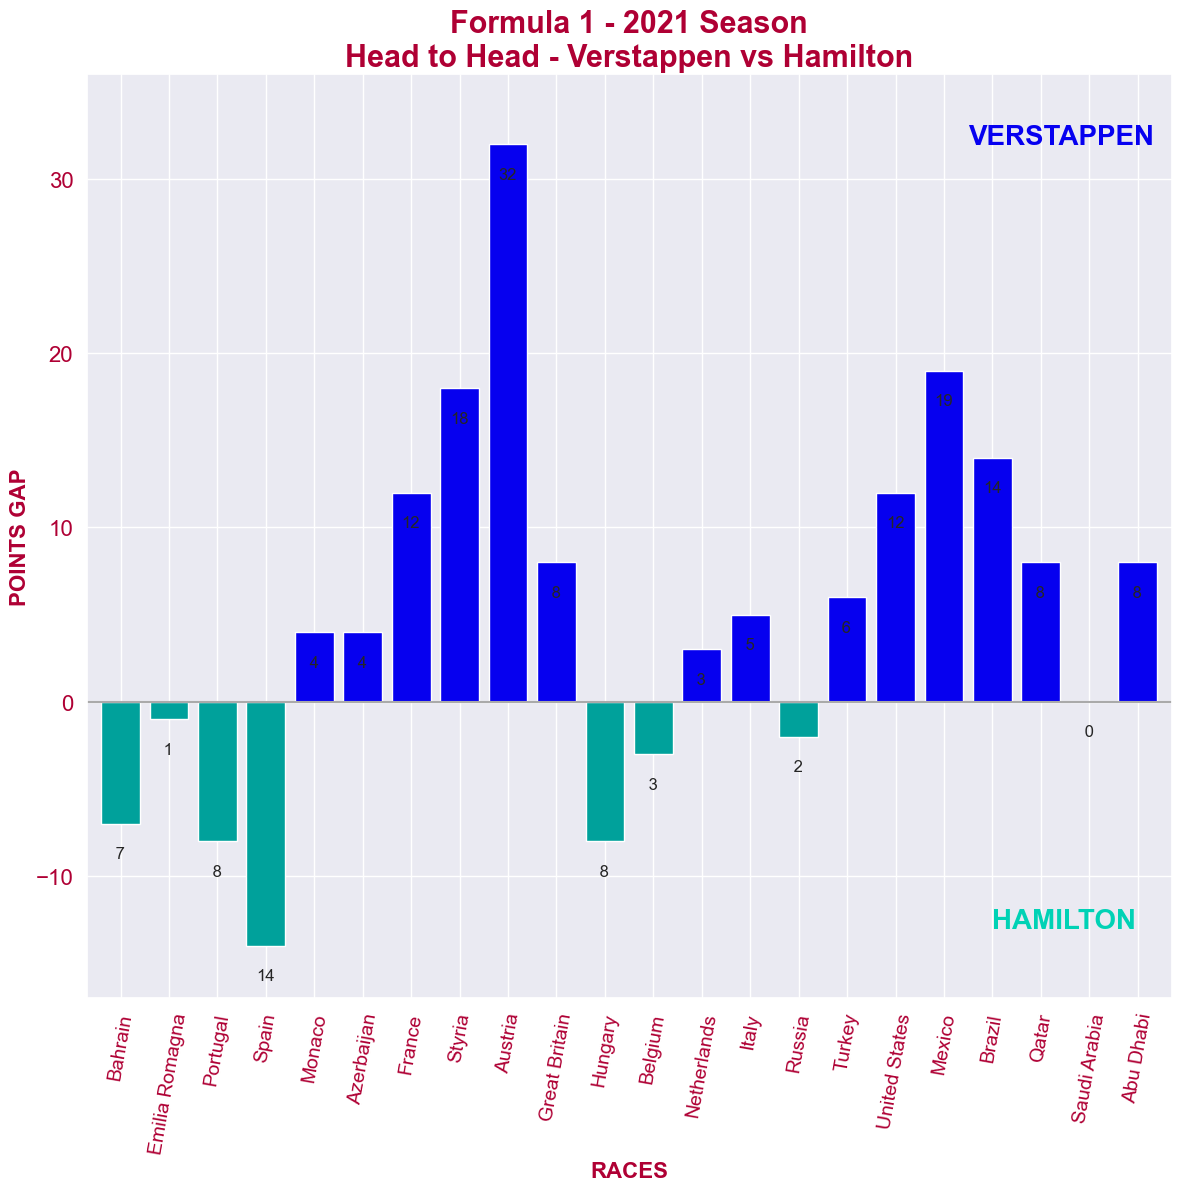

In [20]:
ver_pts= race_results[race_results['Driver']=='Max Verstappen']['Points'].values
ham_pts= race_results[race_results['Driver']=='Lewis Hamilton']['Points'].values

pt_gap = np.cumsum(ver_pts)- np.cumsum(ham_pts)
c=[]

plt.figure(figsize=(14,12))
for i in range(len(pt_gap)):
    if pt_gap[i] >0:
        c.append('#0600EF')
    else:
        c.append('#00A19B')
plt.axis([-0.7, 21.7, min(pt_gap)-3, max(pt_gap)+4])
plt.bar(tracks,pt_gap,color=c)

for i in range(len(pt_gap)):
    if pt_gap[i] >0:
        vsh>=0.5
    else:
        vsh=-2
    plt.text(i-0.2,pt_gap[i]+vsh,"{:2}".format(int(abs(pt_gap[i]))),)
plt.axhline(0, color='#aaaaaa')
plt.text(17.5, 32, "VERSTAPPEN", color="#0600f0", fontsize=20, fontweight='bold')
plt.text(18, -13, "HAMILTON", color="#00d2b5", fontsize=20, fontweight='bold')
plt.title("Formula 1 - 2021 Season\nHead to Head - Verstappen vs Hamilton", color='#af0034', 
          fontsize=22, fontweight='bold')
plt.xlabel('RACES', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#af0034', rotation=80)
plt.ylabel('POINTS GAP', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=16, color='#af0034')
plt.show()

Teams standing 

In [21]:
team_pts=race_results.groupby(['Team'])[['Points']].sum().sort_values(by='Points',ascending=False).reset_index()
team_pts.index=[i for i in range(1,11)]


In [22]:
team_pts=team_pts.values

In [23]:
race_results.groupby(['Team'])[['Points']].sum().sort_values(by='Points',ascending=False)

,Points
Team,
Mercedes,613.5
Red Bull Racing Honda,585.5
Ferrari,323.5
McLaren Mercedes,275.0
Alpine Renault,155.0
AlphaTauri Honda,142.0
Aston Martin Mercedes,77.0
Williams Mercedes,23.0
Alfa Romeo Racing Ferrari,13.0


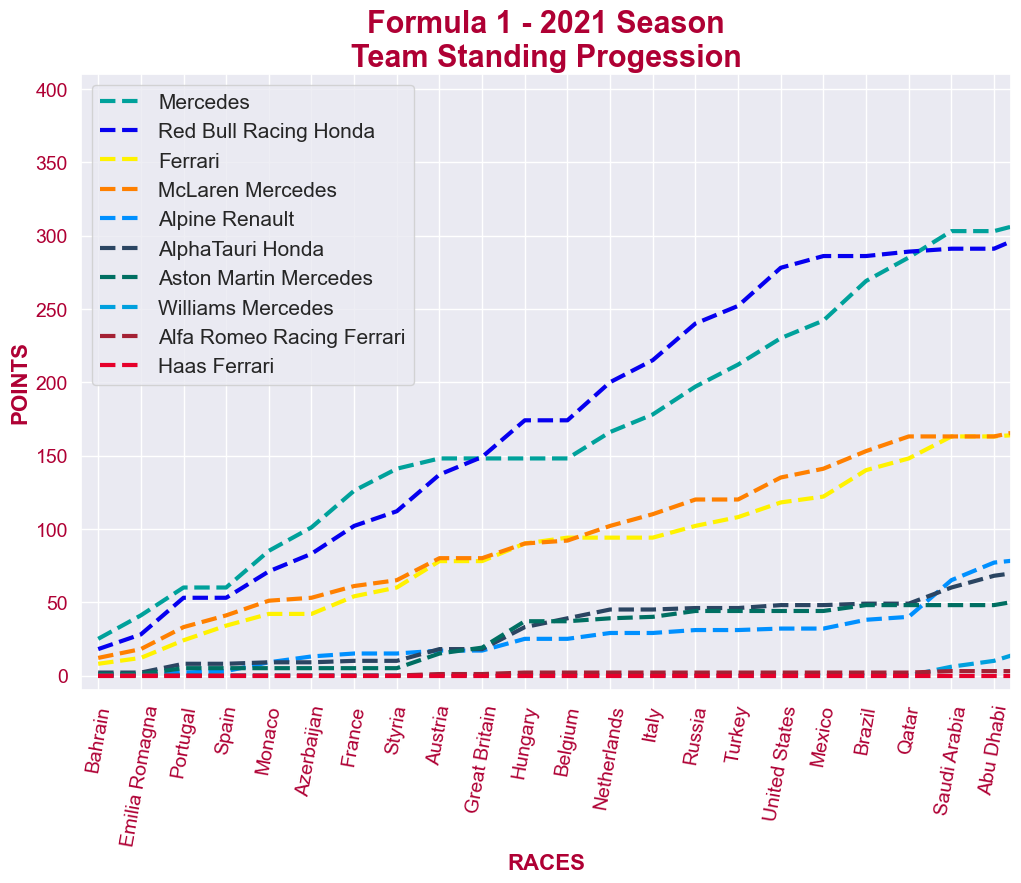

In [24]:
plt.figure(figsize=(12,8))
c=color_pl('teams',team_pts)
plt.axis([-0.4, 21.4, -10, 410])
for i in range(len(team_pts)):
    pts=race_results[race_results['Team']==team_pts[i][0]]['Points'].values

    plt.plot(np.cumsum(pts),linewidth=3,label=team_pts[i][0],linestyle='--',color= c[i])

plt.title("Formula 1 - 2021 Season\nTeam Standing Progession", color='#af0034', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACES', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#af0034', rotation=80)
plt.ylabel('POINTS', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=14, color='#af0034')
plt.show()

Win count

In [25]:
wins=(race_results[race_results['Position']=="1"][['Driver','Team','Track']])
wins

,Driver,Team,Track
0,Lewis Hamilton,Mercedes,Bahrain
20,Max Verstappen,Red Bull Racing Honda,Emilia Romagna
40,Lewis Hamilton,Mercedes,Portugal
60,Lewis Hamilton,Mercedes,Spain
80,Max Verstappen,Red Bull Racing Honda,Monaco
100,Sergio Perez,Red Bull Racing Honda,Azerbaijan
120,Max Verstappen,Red Bull Racing Honda,France
140,Max Verstappen,Red Bull Racing Honda,Styria
160,Max Verstappen,Red Bull Racing Honda,Austria
180,Lewis Hamilton,Mercedes,Great Britain


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


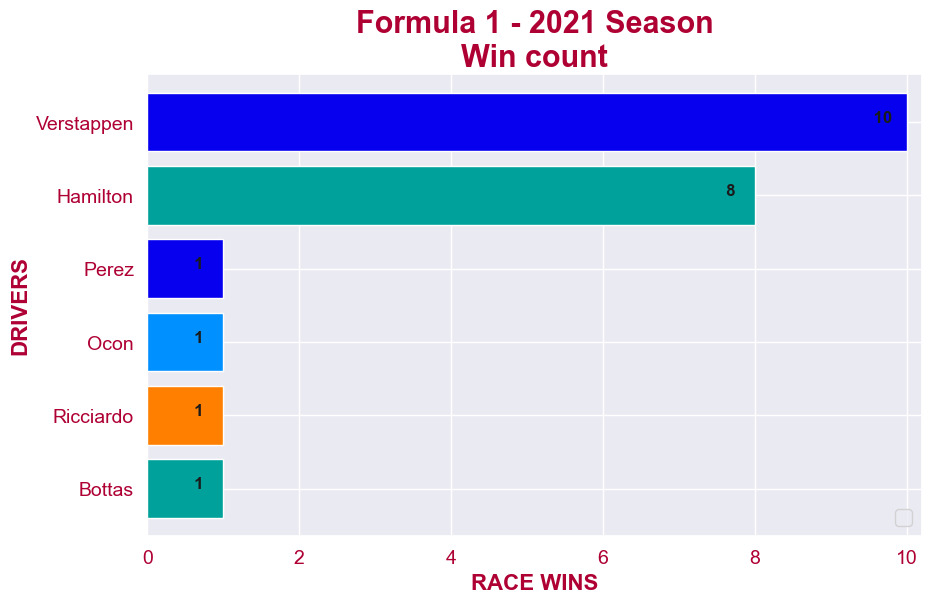

In [26]:
wins_count=wins['Driver'].value_counts()
c=color_pl(value='driver',top10=wins_count.index)
names= [driver.split()[1] for driver in wins_count.index]

plt.figure(figsize=(10,6))
plt.axis([0,10.2,5.65,-0.65])

plt.barh(names,wins_count.values , color=c)

for i in range(len(wins_count)):
    plt.text(wins_count.values[i]-0.5, i,"{:3}".format(wins_count.values[i]),color='k',fontweight='bold')

plt.title("Formula 1 - 2021 Season\nWin count", color='#af0034', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACE WINS', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(fontsize=14, color='#af0034')
plt.ylabel('DRIVERS', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=14, color='#af0034')
plt.show()



## Poles count

In [27]:
poles_count=race_results[race_results['Starting Grid']==1][['Driver','Team','Track']]
poles_count.set_index('Track',inplace=True)
poles_count

,Driver,Team
Track,,
Bahrain,Max Verstappen,Red Bull Racing Honda
Emilia Romagna,Lewis Hamilton,Mercedes
Portugal,Valtteri Bottas,Mercedes
Spain,Lewis Hamilton,Mercedes
Monaco,Charles Leclerc,Ferrari
Azerbaijan,Charles Leclerc,Ferrari
France,Max Verstappen,Red Bull Racing Honda
Styria,Max Verstappen,Red Bull Racing Honda
Austria,Max Verstappen,Red Bull Racing Honda


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


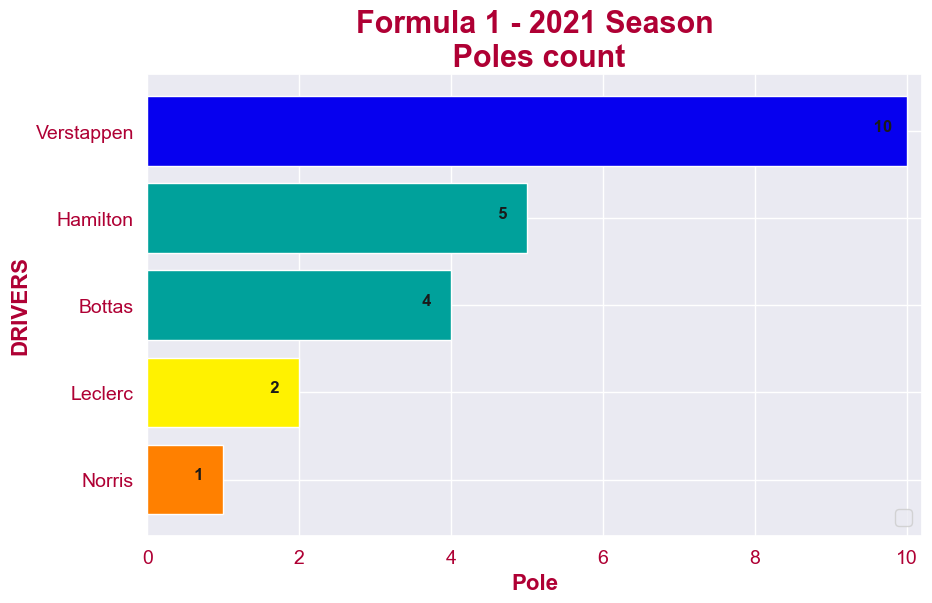

In [28]:
poles_count=poles_count['Driver'].value_counts()
c= color_pl('driver',poles_count.index)

plt.figure(figsize=(10,6))
plt.axis([0,10.2,4.65,-0.65])

plt.barh([driver.split()[1] for driver in poles_count.index],poles_count.values , color=c)

for i in range(len(poles_count)):
    plt.text(poles_count.values[i]-0.5, i,"{:3}".format(poles_count.values[i]),color='k',fontweight='bold')

plt.title("Formula 1 - 2021 Season\n Poles count", color='#af0034', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('Pole', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(fontsize=14, color='#af0034')
plt.ylabel('DRIVERS', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=14, color='#af0034')
plt.show()


### Podium finishes

In [29]:
podium_finish= race_results[race_results['Position'].isin(['1','2','3'])][['Driver','Team','Track']]
podium_finish.set_index('Track',inplace=True)
podium_finishers=podium_finish['Driver'].value_counts()
podium_finishers

Driver
Max Verstappen      18
Lewis Hamilton      17
Valtteri Bottas     11
Sergio Perez         5
Lando Norris         4
Carlos Sainz         4
Sebastian Vettel     1
Pierre Gasly         1
Charles Leclerc      1
Esteban Ocon         1
George Russell       1
Daniel Ricciardo     1
Fernando Alonso      1
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


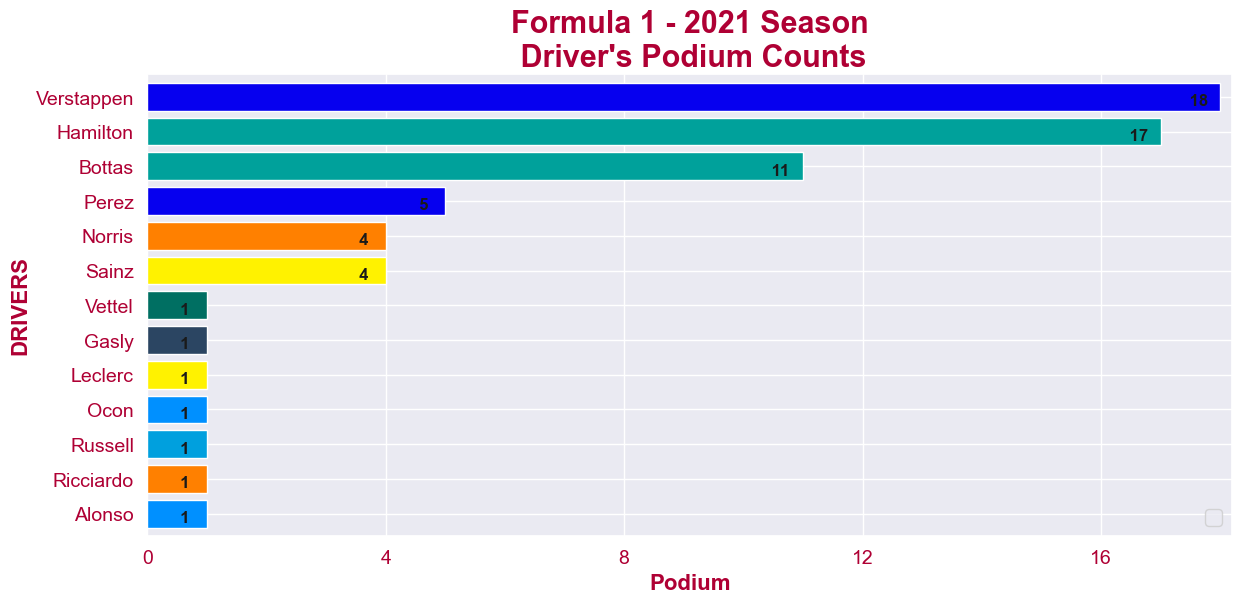

In [30]:
c= color_pl('driver',podium_finishers.index)

plt.figure(figsize=(14,6))
plt.axis([0,18.2,12.65,-0.65])

plt.barh([driver.split()[1] for driver in podium_finishers.index],podium_finishers.values , color=c)

for i in range(len(podium_finishers)):
    plt.text(podium_finishers.values[i]-0.6, i+0.25,"{:3}".format(podium_finishers.values[i]),color='k',fontweight='bold')

plt.title("Formula 1 - 2021 Season\n Driver's Podium Counts", color='#af0034', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('Podium', fontsize=16, color='#af0034', fontweight='bold')
plt.xticks(range(0,20,4),fontsize=14, color='#af0034')
plt.ylabel('DRIVERS', fontsize=16, color='#af0034', fontweight='bold')
plt.yticks(fontsize=14, color='#af0034')
plt.show()


### Top Finishes

In [31]:
top10_finsih=race_results[race_results['Position'].isin([str(i) for i in range(1,11)])]['Driver']
top10_finsih.value_counts()

Driver
Lewis Hamilton        20
Lando Norris          20
Carlos Sainz          20
Max Verstappen        19
Charles Leclerc       18
Sergio Perez          16
Valtteri Bottas       15
Fernando Alonso       15
Pierre Gasly          15
Esteban Ocon          14
Daniel Ricciardo      13
Lance Stroll           9
Yuki Tsunoda           7
Sebastian Vettel       7
Kimi Raikkönen         4
George Russell         4
Antonio Giovinazzi     2
Nicholas Latifi        2
Name: count, dtype: int64

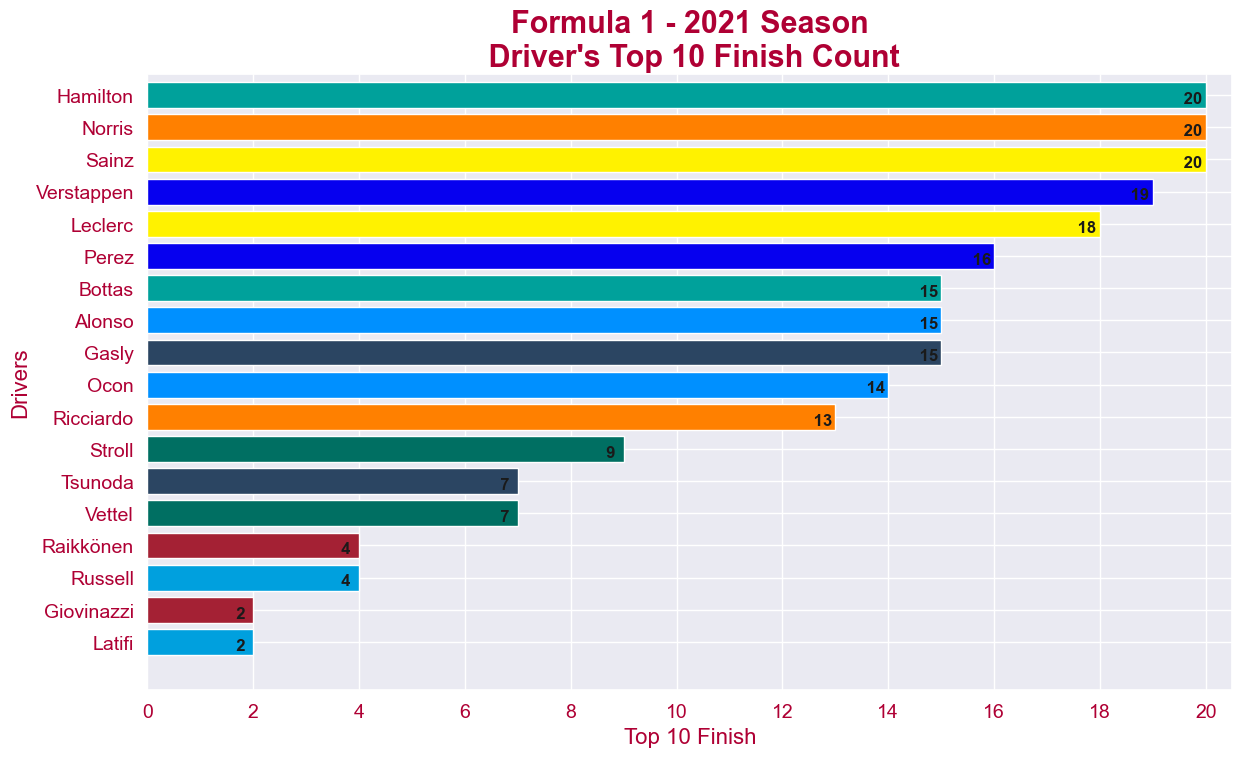

In [32]:
top10_finsihers=top10_finsih.value_counts()
c=color_pl('driver',top10_finsihers.index)
plt.figure(figsize=(14,8))
plt.axis([0,20.5, 18.5,-0.65])

plt.barh([driver.split()[1] for driver in top10_finsihers.index],top10_finsihers.values,color=c)

for i in range(len(top10_finsihers)):
    plt.text(top10_finsihers.values[i]-0.5, i+0.25,"{:3}".format(top10_finsihers.values[i]),fontweight='bold',color='k')

plt.title("Formula 1 - 2021 Season\n Driver's Top 10 Finish Count",fontsize=22, fontweight='bold',color='#af0034')
plt.xlabel("Top 10 Finish",fontsize=16,color='#af0034')
plt.ylabel("Drivers",fontsize=16,color='#af0034')
plt.xticks(range(0,21,2),fontsize=14,color='#af0034')
plt.yticks(fontsize=14,color='#af0034')
plt.show()


### Fastest lap count

In [33]:
fastest_lap=race_results[race_results['+1 Pt']=='Yes'][['Driver','Team','Track']]
fastest_lap.set_index('Track',inplace=True)
fastest_lap

,Driver,Team
Track,,
Bahrain,Valtteri Bottas,Mercedes
Emilia Romagna,Lewis Hamilton,Mercedes
Portugal,Valtteri Bottas,Mercedes
Spain,Max Verstappen,Red Bull Racing Honda
Monaco,Lewis Hamilton,Mercedes
France,Max Verstappen,Red Bull Racing Honda
Styria,Lewis Hamilton,Mercedes
Austria,Max Verstappen,Red Bull Racing Honda
Hungary,Pierre Gasly,AlphaTauri Honda


In [34]:
fastest_lap_dr= fastest_lap['Driver'].value_counts()
fastest_lap_dr

Driver
Lewis Hamilton      6
Max Verstappen      5
Valtteri Bottas     3
Pierre Gasly        1
Daniel Ricciardo    1
Lando Norris        1
Sergio Perez        1
Name: count, dtype: int64

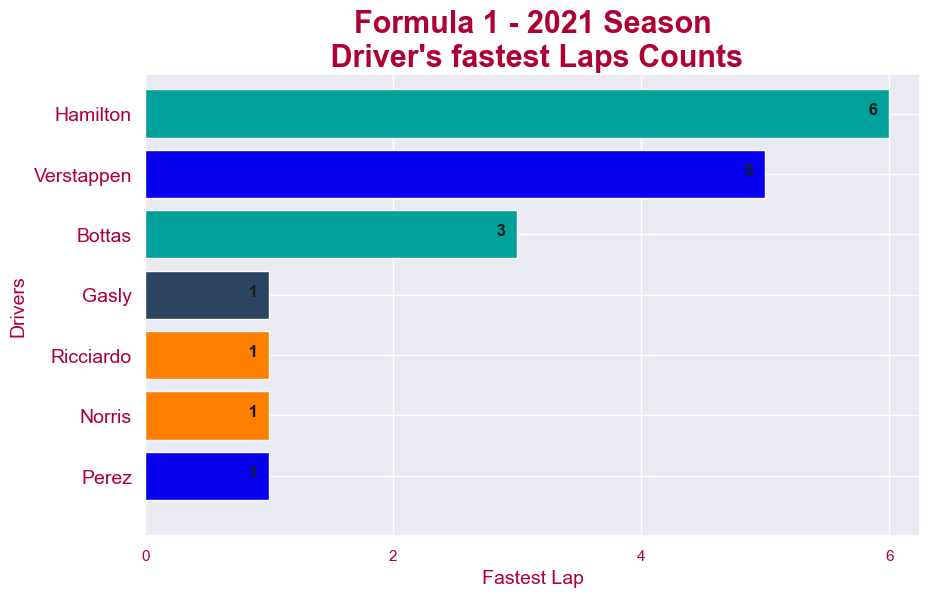

In [35]:
c = color_pl('driver',fastest_lap_dr.index)

plt.figure(figsize=(10,6))
plt.axis([0,6.25,7.0,-0.65])

plt.barh([driver.split()[1] for driver in fastest_lap_dr.index],fastest_lap_dr.values,color=c)

for i in range(len(fastest_lap_dr)):
    plt.text(fastest_lap_dr[i]-0.2,i+0.02,"{:2}".format(fastest_lap_dr.values[i]),fontweight='bold',color='k')

plt.title("Formula 1 - 2021 Season\n Driver's fastest Laps Counts",fontsize=22,fontweight='bold',color='#af0034')
plt.xlabel('Fastest Lap',fontsize=14,color='#af0034')
plt.ylabel('Drivers',fontsize=14,color='#af0034')
plt.xticks(range(0,7,2),color='#af0034')
plt.yticks(fontsize=14,color='#af0034')
plt.show()

### DNF

now let us try to get insights about drivers who had DNF's during the season

In [36]:
race_dnf=race_results[race_results['Time/Retired']=='DNF'][['Driver','Team']]
race_dnf['Driver'].value_counts()

Driver
George Russell        6
Nikita Mazepin        5
Nicholas Latifi       5
Pierre Gasly          4
Sebastian Vettel      4
Valtteri Bottas       4
Lance Stroll          3
Mick Schumacher       3
Sergio Perez          3
Esteban Ocon          3
Max Verstappen        3
Yuki Tsunoda          3
Kimi Raikkönen        2
Fernando Alonso       2
Lando Norris          1
Charles Leclerc       1
Lewis Hamilton        1
Daniel Ricciardo      1
Antonio Giovinazzi    1
Name: count, dtype: int64

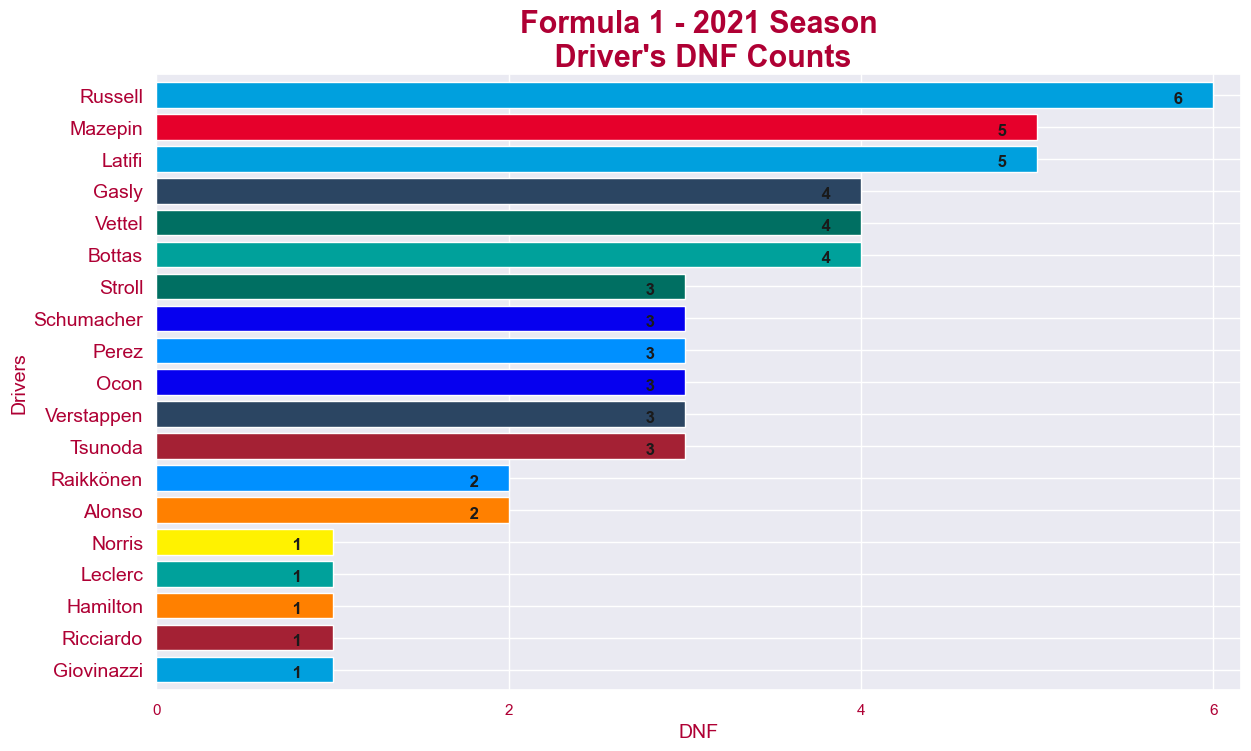

In [37]:
dfn_tesm=race_dnf['Driver'].value_counts()

c= color_pl('driver',dfn_tesm.index)
plt.figure(figsize=(14,8))
plt.axis([0,6.16,18.65,-0.65])

plt.barh([driver.split()[1] for driver in dfn_tesm.index],dfn_tesm.values,color=c)
for i in range(len(dfn_tesm)):
    plt.text(dfn_tesm.values[i]-0.25,i+0.25,"{:2}".format(dfn_tesm.values[i]),fontweight='bold',color='k')

plt.title("Formula 1 - 2021 Season\n Driver's DNF Counts",fontsize=22,fontweight='bold',color='#af0034')
plt.xlabel('DNF',fontsize=14,color='#af0034')
plt.ylabel('Drivers',fontsize=14,color='#af0034')
plt.xticks(range(0,7,2),color='#af0034')
plt.yticks(fontsize=14,color='#af0034')
plt.show()

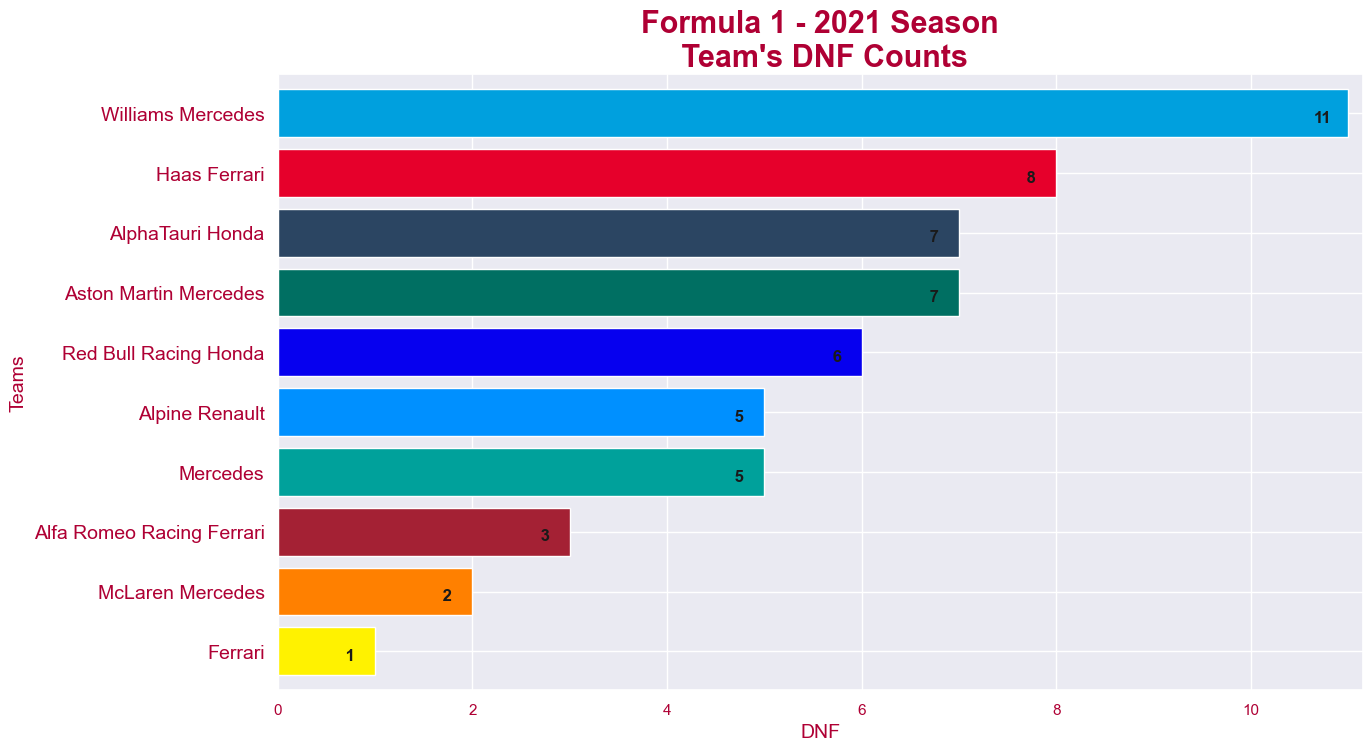

In [38]:
dnf_tesm=race_results[race_results['Time/Retired']=='DNF']['Team'].value_counts()

c= color_pl('team',dnf_tesm.index)
plt.figure(figsize=(14,8))
plt.axis([0,11.15,9.65,-0.65])

plt.barh(dnf_tesm.index,dnf_tesm.values,color=c)
for i in range(len(dnf_tesm)):
    plt.text(dnf_tesm.values[i]-0.35,i+0.15,"{:2}".format(dnf_tesm.values[i]),fontweight='bold',color='k')

plt.title("Formula 1 - 2021 Season\n Team's DNF Counts",fontsize=22,fontweight='bold',color='#af0034')
plt.xlabel('DNF',fontsize=14,color='#af0034')
plt.ylabel('Teams',fontsize=14,color='#af0034')
plt.xticks(range(0,12,2),color='#af0034')
plt.yticks(fontsize=14,color='#af0034')
plt.show()